# Tesseract

If AWS turns out not to be able to extract rotated text properly (As claimed [here](https://repost.aws/questions/QU0zEBz7pDQeKDPq_wzA3Pbw/textract-text-detection-orientation-and-results-ordering))

- Tesseract’s Orientation and Script Detection (OSD) can be used to analyze the text in the image and identify how the image is rotated
- After this step, AWS or Tesseract could be used to only search for rotated Text if there is any present in the image
- Seems to not work reliably when there is both rotated and not rotated text in the image

possible pipeline setup:
- initial orientation check with image_to_osd
- rotate image accordingly and assume most text is oriented correctly
- additional pass to check for high bounding boxes or low confidence detections
- if yes, run ocr again on rotated image
- clean up and combine data

The image is rotated by 0 degrees.
{'page_num': 0, 'orientation': 0, 'rotate': 0, 'orientation_conf': 3.69, 'script': 'Fraktur', 'script_conf': 5.83}


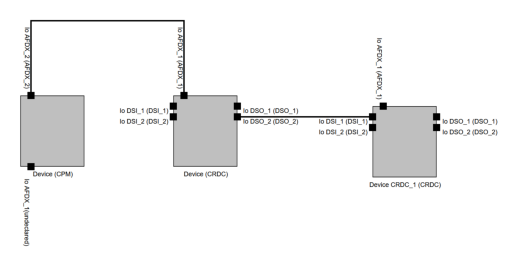

In [8]:
import cv2
import pytesseract
from pytesseract import Output
from matplotlib import pyplot as plt

image_path = "images/testcase11.png"

image = cv2.imread(image_path)
rgb_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

osd_data = pytesseract.image_to_osd(rgb_image, output_type=Output.DICT)
rotation_angle = osd_data.get('rotate', 0)

print(f"The image is rotated by {rotation_angle} degrees.")
print(osd_data)
plt.imshow(rgb_image)
plt.axis('off')
plt.show()